In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [26]:
data_path = r"creditcard.csv"
df = pd.read_csv(data_path)

In [28]:
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]

In [29]:
df.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


C:\Users\nosha\AppData\Local\Temp\ipykernel_10448\1189189170.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_counts = pd.value_counts(df['Class'], sort = True)


Text(0, 0.5, 'Counts')

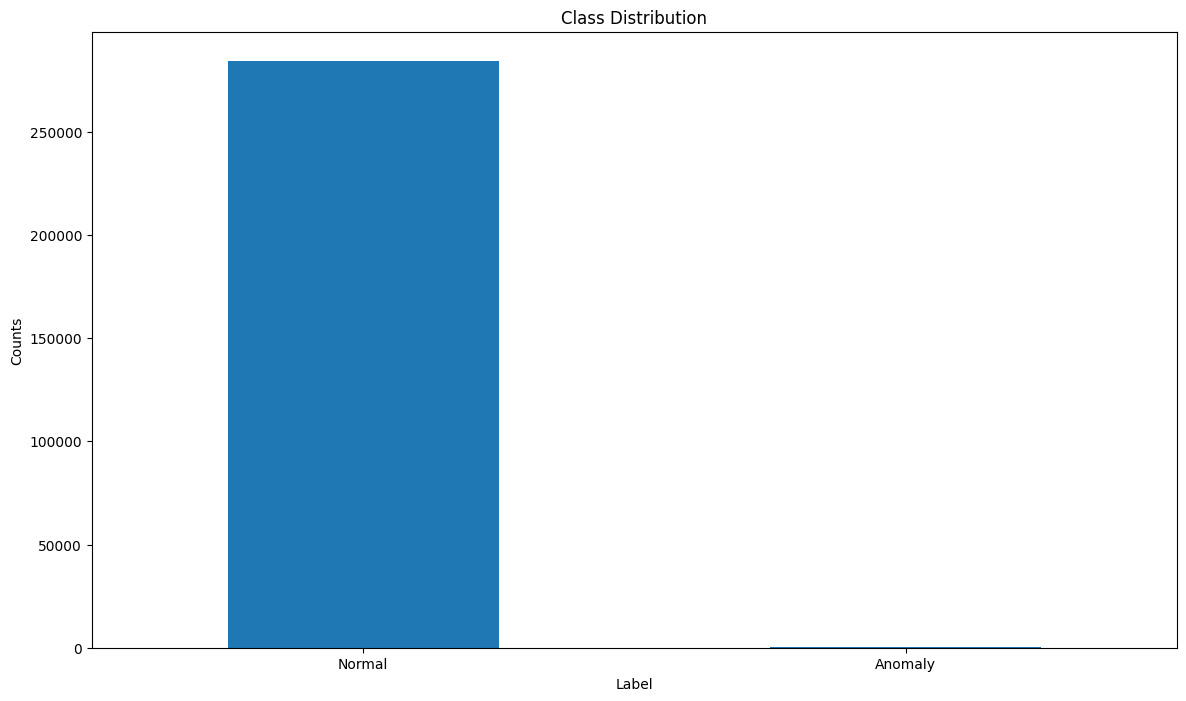

In [30]:
class_counts = pd.value_counts(df['Class'], sort = True)
class_counts.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Label")
plt.ylabel("Counts")

In [33]:
anomalies.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [34]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [36]:
def plot_histogram(df, bins, column, log_scale=False):
    bins = 100
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Counts of {column} by Class')
    ax1.hist(anomalies[column], bins = bins, color="red")
    ax1.set_title('Anomaly')
    ax2.hist(normal[column], bins = bins, color="orange")
    ax2.set_title('Normal')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    if log_scale:
        plt.yscale('log')
    plt.xlim((np.min(df[column]), np.max(df[column])))
    plt.show()

In [37]:
def plot_scatter(df, x_col, y_col, sharey = False):
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
    sharey=sharey)
    fig.suptitle(f'{y_col} over {x_col} by Class')
    ax1.scatter(anomalies[x_col], anomalies[y_col], color='red')
    ax1.set_title('Anomaly')
    ax2.scatter(normal[x_col], normal[y_col], color='orange')
    ax2.set_title('Normal')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

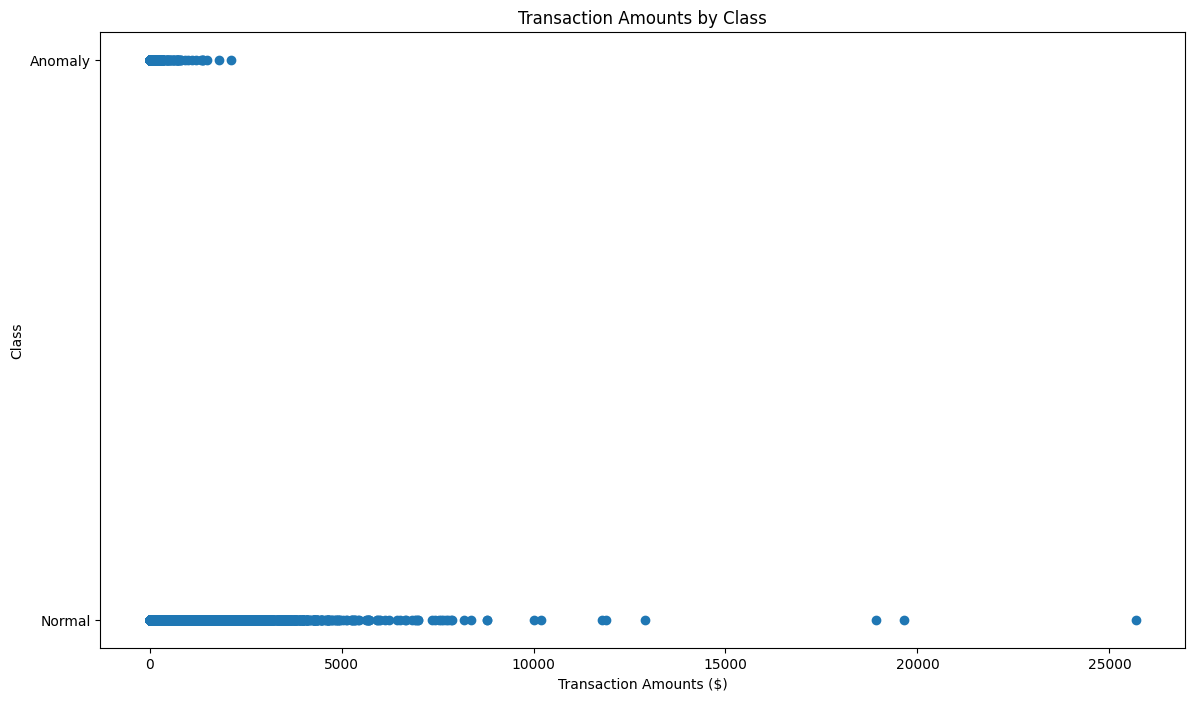

In [38]:
plt.scatter(df.Amount, df.Class)
plt.title("Transaction Amounts by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Transaction Amounts ($)")
plt.show()

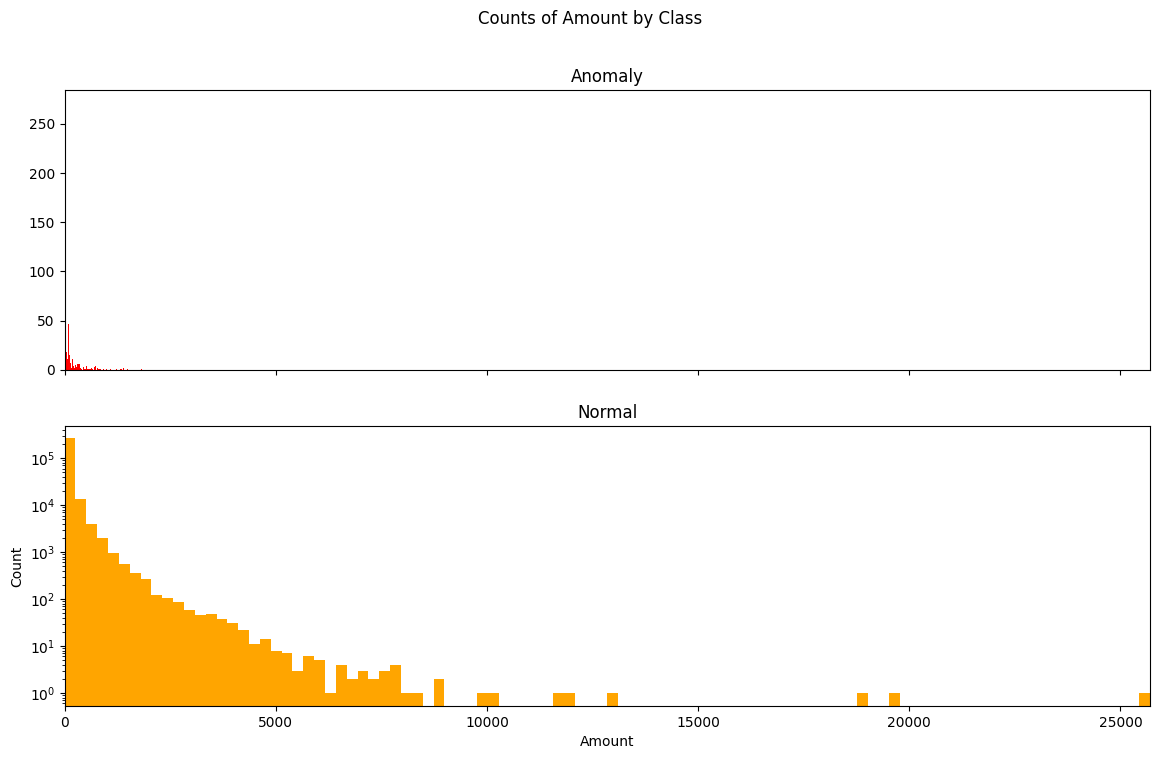

In [39]:
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

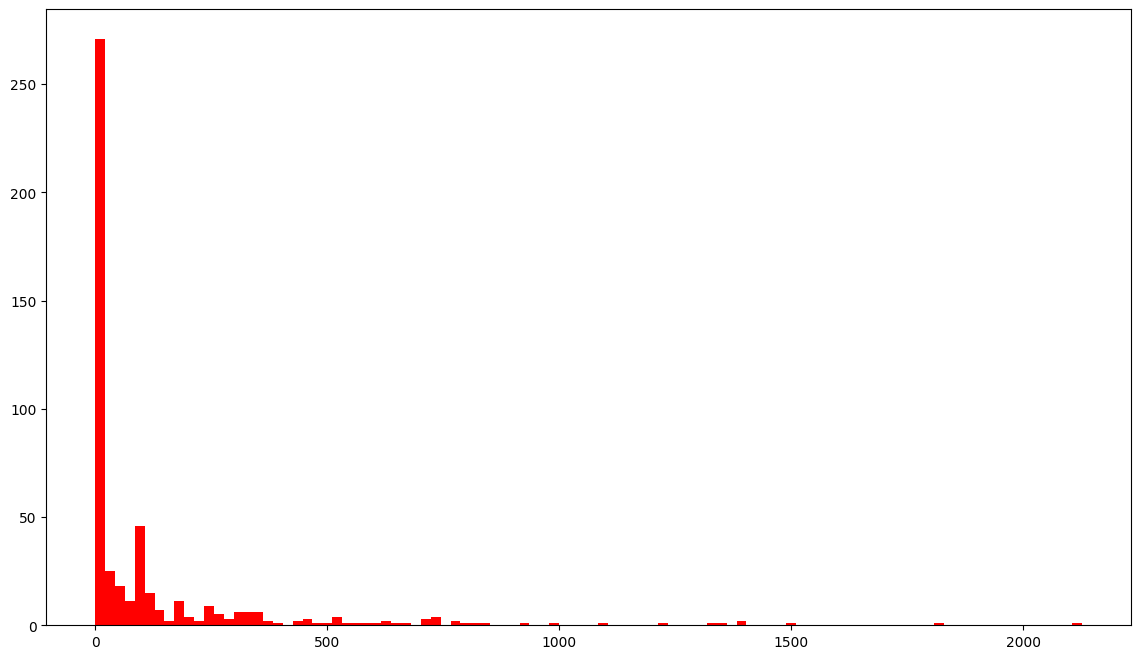

In [40]:
plt.hist(anomalies.Amount, bins = bins, color="red")
plt.show()

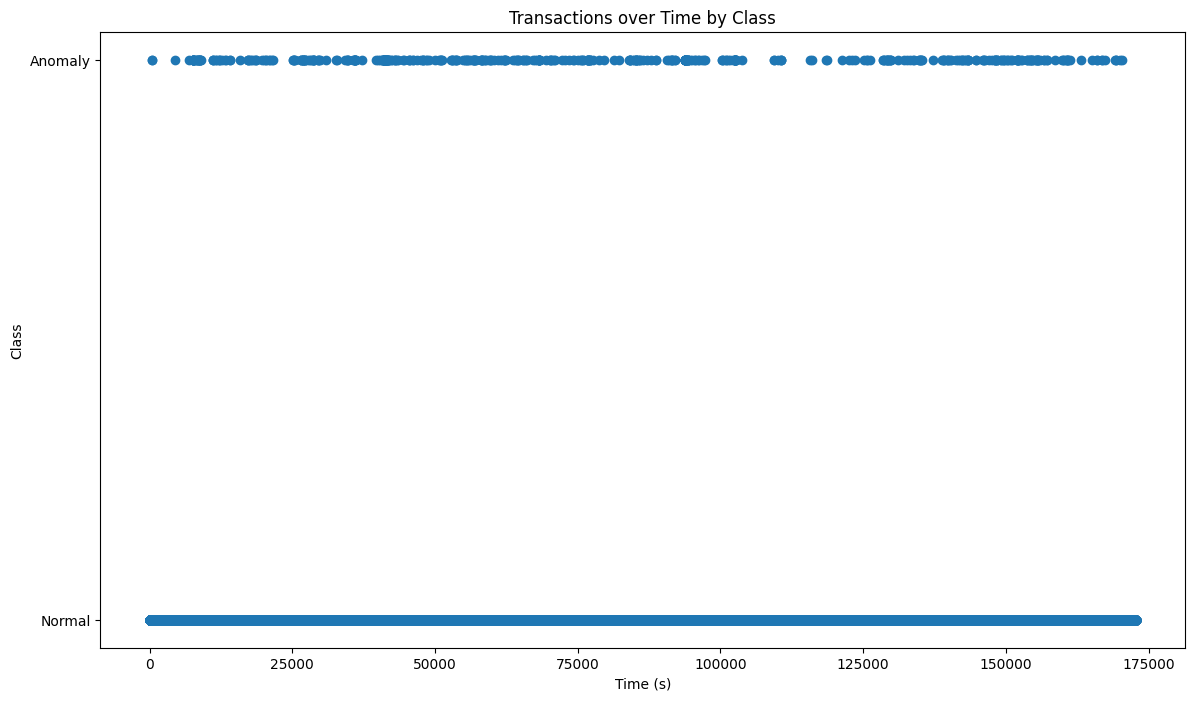

In [41]:
plt.scatter(df.Time, df.Class)
plt.title("Transactions over Time by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Time (s)")
plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib #
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn #
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay,confusion_matrix
from sklearn.model_selection import KFold
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("sklearn: {}".format(sklearn.__version__))

numpy: 2.2.6
pandas: 2.3.1
matplotlib: 3.10.5
seaborn: 0.13.2
sklearn: 1.7.1


In [50]:
normal_train, normal_test = train_test_split(normal, test_size= 0.2, random_state = 2020)
anomaly_train, anomaly_test = train_test_split(anomalies,test_size = 0.2, random_state = 2020)

In [53]:
normal_train, normal_validate = train_test_split(normal_train,
test_size = 0.25, random_state = 2020)
anomaly_train, anomaly_validate = train_test_split(anomaly_train, test_size = 0.25, random_state = 2020)

In [62]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))

In [63]:
y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

In [65]:
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)

In [66]:
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomalies)).drop("Class", axis=1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

In [67]:
sk_model = LogisticRegression(random_state=None, max_iter=400,
solver='newton-cg').fit(x_train, y_train)

In [69]:
eval_acc = sk_model.score(x_test, y_test)
eval_acc


0.9991397773954567

In [70]:
preds = sk_model.predict(x_test)
auc_score = roc_auc_score(y_test, preds)

In [71]:
print(f"Auc Score: {auc_score:.3%}")
print(f"Eval Accuracy: {eval_acc:.3%}")

Auc Score: 78.782%
Eval Accuracy: 99.914%


In [74]:
y_score = sk_model.predict_proba(x_test)[:, 1] 
y_score

array([6.74513110e-05, 8.00354286e-05, 2.28931292e-04, ...,
       4.23304931e-02, 3.24562050e-01, 9.99999980e-01], shape=(56962,))

Text(0.5, 58.7222222222222, 'Predicted')

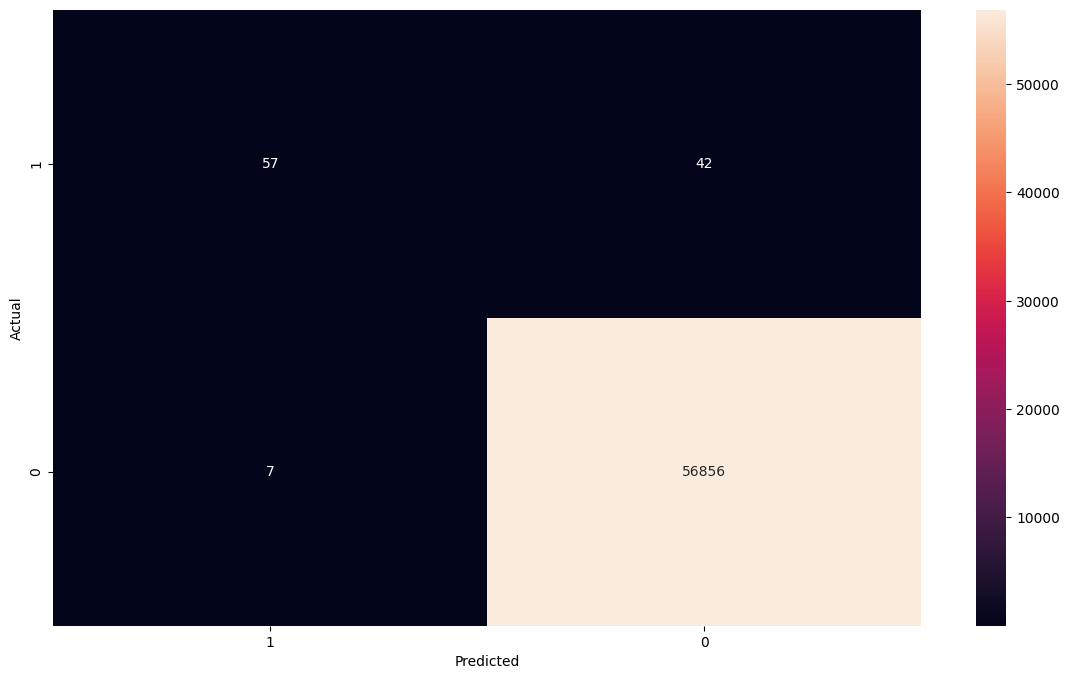

In [77]:
conf_matrix = confusion_matrix(y_test, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [78]:
anomaly_weights = [1, 5, 10, 15]
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True,
random_state=2020)

In [84]:
logs = []
accuracies = []
auc_scores = []

for f, weight in enumerate(anomaly_weights):
    fold = 1
    for train, test in kfold.split(x_validate, y_validate):
        class_weights = {0:1, 1: weight}
        sk_model = LogisticRegression(
            random_state=None,
            max_iter=400,
            solver='newton-cg',
            class_weight=class_weights
        ).fit(x_validate[train], y_validate[train])

        print("\n" + "-"*40)
        print(f"fold {fold}, Anomaly Weight: {weight}")

        eval_acc = sk_model.score(x_validate[test], y_validate[test])
        preds = sk_model.predict(x_validate[test])
        probs = sk_model.predict_proba(x_validate[test])[:, 1]

        auc_score = roc_auc_score(y_validate[test], probs)

        print(f"eval_acc: {eval_acc}, AUC: {auc_score}")

        accuracies.append(eval_acc)
        auc_scores.append(auc_score)
        logs.append([sk_model, x_validate[test], y_validate[test], preds])
        fold += 1

print("\nAverages: ")
print("Accuracy: ", np.mean(accuracies))
print("AUC: ", np.mean(auc_scores))
print("Best: ")
print("Accuracy: ", np.max(accuracies))
print("AUC: ", np.max(auc_scores))
    


----------------------------------------
fold 1, Anomaly Weight: 1
eval_acc: 0.9989467216712016, AUC: 0.9917861649650108

----------------------------------------
fold 2, Anomaly Weight: 1
eval_acc: 0.9990344948652682, AUC: 0.9988085817286556

----------------------------------------
fold 3, Anomaly Weight: 1
eval_acc: 0.9993855337078652, AUC: 0.9931906981418898

----------------------------------------
fold 4, Anomaly Weight: 1
eval_acc: 0.9989466292134831, AUC: 0.8590069004922644

----------------------------------------
fold 5, Anomaly Weight: 1
eval_acc: 0.999122191011236, AUC: 0.9657360229907399

----------------------------------------
fold 1, Anomaly Weight: 5
eval_acc: 0.9989467216712016, AUC: 0.9914305380291385

----------------------------------------
fold 2, Anomaly Weight: 5
eval_acc: 0.9993855876415343, AUC: 0.9989448694275916

----------------------------------------
fold 3, Anomaly Weight: 5
eval_acc: 0.9992099719101124, AUC: 0.9921521330368398

------------------------